# Guide on bias correction by linear corrector

#### First step is to prepare regression model for prediction 
We use simple linear regression on toy diabetes dataset. The Loss function is MSE

In [1]:
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.33, random_state=42
)

regr = svm.SVR(kernel='rbf', C=20)
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print("Mean absolute error train: %.2f" % mean_absolute_error(y_train, y_train_pred))
print("Mean absolute error test : %.2f" % mean_absolute_error(y_test, y_test_pred))

Mean absolute error train: 39.35
Mean absolute error test : 40.55


#### Plot results of model prediction. Bias

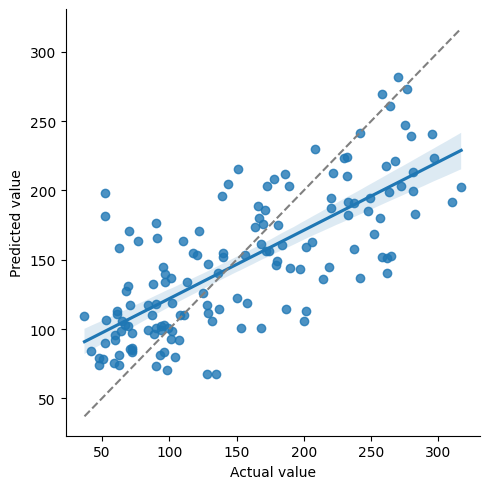

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ylim = y_test.min(), y_test.max()

sns.lmplot(pd.DataFrame({'actual': y_test, 'pred': y_test_pred}), x='actual', y='pred')
plt.plot(ylim, ylim, '--', color='gray', label='Diagonal')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

plt.show()

In this way, applying simple model leads to bias between actual and predicted values

#### Bias correction

In [3]:
from regression_bias_corrector import LinearBiasCorrector
corrector = LinearBiasCorrector()
corrector.fit(y_train, y_train_pred)
y_test_pred_unbiased = corrector.predict(y_test_pred)

In [4]:
import regression_bias_corrector
regression_bias_corrector.__version__

'0.0.2.dev0+ga164560.d20241107'

In [ ]:
# Import Linear Bias corrector
from regression_bias_corrector import LinearBiasCorrector

# Create instance of corrector
corrector = LinearBiasCorrector()

# Fit corrector on actual outcome variable and on predicted values of the model for train dataset
# y_train - actual values
# y_train_pred - predicted values
corrector.fit(y_train, y_train_pred)

# correct predicted values on test dataset
# y_test_pred - predicted values by model on test dataset
y_test_pred_unbiased = corrector.predict(y_test_pred)

# y_test_pred_unbiased - unbiased predicted values on test

In [13]:
print('Predicted value         :', y_test_pred[0])
print('Unbiased predicted value:', y_test_pred_unbiased[0])

Predicted value         : 144.6018333588398
Unbiased predicted value: 142.30846149601413


#### Plot results

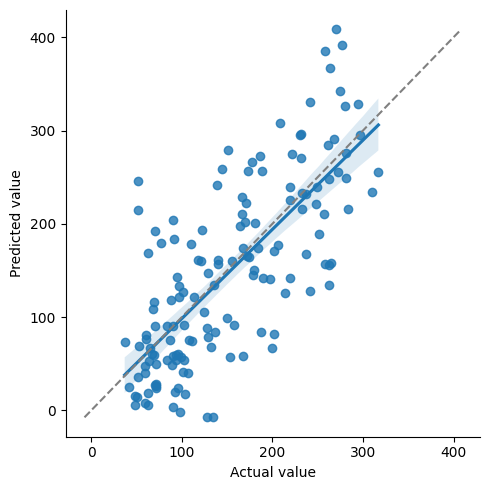

In [6]:
import matplotlib.pyplot as plt

ylim = y_test_pred_unbiased.min(), y_test_pred_unbiased.max()

sns.lmplot(pd.DataFrame({'actual': y_test, 'pred': y_test_pred_unbiased}), x='actual', y='pred')
plt.plot(ylim, ylim, '--', color='gray', label='Diagonal')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

plt.show()

After bias correction the regression line between actual and predicted values is almost equal to diagonal
However there are drawbacks:
1. Results can be negative here
2. MAE/MSE is increasing by the factor

In [7]:
print("Mean absolute error test biased:   %.2f" % mean_absolute_error(y_test, y_test_pred))
print("Mean absolute error test unbiased: %.2f" % mean_absolute_error(y_test, y_test_pred_unbiased))

Mean absolute error test biased:   40.55
Mean absolute error test unbiased: 53.09


#### Save model

In [8]:
corrector.save('linear_corrector.yml')

#### Load model

In [9]:
loaded_corrector = LinearBiasCorrector.load('linear_corrector.yml')

#### Test loaded model

In [16]:
y_test_pred_unbiased = loaded_corrector.predict(y_test_pred)

In [15]:
print('Predicted value         :', y_test_pred[0])
print('Unbiased predicted value:', y_test_pred_unbiased[0])

Predicted value         : 144.6018333588398
Unbiased predicted value: 142.30846149601413
